# Intro to Statistical Machine Learning

## Lecture 1

## Prof. James Sharpnack

#### The life satisfaction data example and some of the code is based on the notebook file [01 in Aurélien Geron's github page](https://github.com/ageron/handson-ml)

## Machine Learning

A computer program learns from experience, E, with respect to class of tasks, T, and performance measure, P, if its performance at T improves by P with E.

Examples of these categories are,
- E: data (training)
- P: loss (test), reward
- T: classification, regression, expert selection, etc. 

## Inference vs. Prediction

- statistical inference: is this effect significant? is the model correct? etc.
- prediction: does this algorithm predict the response variable well?

### terms

- *supervised learning*: predicting one variable from many others
- *predictor* variables: X variables
- *response* variable: Y variable
- ``X``: $n \times p$ design matrix / features
- ``Y``: $n$ label vector


In [8]:
!pip install sklearn statsmodels
!conda install numpy scipy matplotlib seaborn pandas


Solving environment: ...working... done

# All requested packages already installed.



In [9]:
## I will be using Python 3, for install instructions see 
## http://anson.ucdavis.edu/~jsharpna/DSBook/unit1/intro.html#installation-and-workflow

## The following packages are numpy (linear algebra), pandas (data munging), 
## sklearn (machine learning), matplotlib (graphics), statsmodels (statistical models)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
## Lines that start with ! run a bash command

!ls -l ../../data/winequality-red.csv

-rw-r--r--  1 kourosh  staff  84199 Apr  6 14:29 ../../data/winequality-red.csv


In [9]:
!head ../../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


Wine dataset description
- 84199 bytes (not large, feel free to load into memory)
- header with quotations " in the text
- each line has floats without quotations
- each datum separated by ;

Some Python basics:
- file input/output
- [f(a) for a in L] list comprehensions
- iterables, basic types, built-in functions

In [16]:
datapath = "../../data/"
#line.strip() removes the whitespaces
# x.split(;) splits elements seperated by semicolon in x to a list 
with open(datapath + 'winequality-red.csv','r') as winefile:
    header = winefile.readline()
    wine_list = [line.strip().split(';') for line in winefile]

In [40]:
# convert list of list to array
#list of list is iterateable
wine_ar = np.array(wine_list,dtype=np.float64)
print(wine_ar.shape)

1599
(1599, 12)


In [41]:
#processes the header
names = [name.strip('"') for name in header.strip().split(';')]
print(names)
print(len(names))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
12


In [57]:
#Subselect the predictor X and response y
y = wine_ar[:,-1]
print("length of y")
print(len(y))
X = wine_ar[:,:-1]
print("size of X")
print(X.shape)
n,p = X.shape

length of y
1599
size of X
(1599, 11)


In [58]:
y.shape, X.shape #just checking

((1599,), (1599, 11))

In [59]:
import statsmodels.api as sm

# stasmodels api doesn't add intercept (b0) by itself, we need to add it manually (see below)
print(X.shape)
X = np.hstack((np.ones((n,1)),X)) #add intercept
print("size after adding intercept")
print(X.shape)
wine_ols = sm.OLS(y,X) #Initialize the OLS 
wine_res = wine_ols.fit() # fit the OLS model

(1599, 11)
size after adding intercept
(1599, 12)


In [60]:
wine_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 11 Apr 2020   Prob (F-statistic):          1.79e-145
Time:                        15:20:43   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300     -19.607      63.538
x1             0.0250      0.026      0.963      0.336      -0.026       0.076
x2            -1.0836      0.121     -8.948      0.000      -1.321      -0.846
x3            -0.1826      0.147     -1.240      0.215      -0.471       0.106
x4             0.0163      0.015      1.089      0.276      -0.013       0.046
x5            -1.8742      0.419     -4.470      0.000      -2.697      -1.052
x6             0.0044      0.002      2.009      0.045       0.000       0.009
x7            -0.0033      0.001     -4.480      0.000      -0.005      -0.002
x8           -17.8812     21.633     -0.827      0.409     -60.314      24.551
x9            -0.4137      0.192     -2.159      0.031      -0.789      -0.038
x10            0.9163      0.114      8.014      0.000       0.692       1.141
x11            0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear model

$$f_\beta(x_i) = \beta_0 + \sum_{j=1}^p \beta_j x_{i,j}$$

### Inference in linear models

- statistically test for significance of effects
- requires normality assumptions, homoscedasticity, linear model is correct
- hard to obtain significance for individual effect under colinearity

### Prediction perspective

- think of OLS as a black-box model for predicting $Y | X$
- how do we evaluate performance of prediction?
- how do we choose between multiple OLS models?

### Supervised learning

Learning machine that takes $p$-dimensional data $x_i = (x_{i,1}, \ldots, x_{i,p})$ and predicts $y_i \in \mathcal Y$. 

- *Task:* **Predict** $y$ given $x$ as $f_\beta(x)$
- *Performance Metric:* **Loss** measured with some function $\ell(\beta; x,y)$
- *Experience:* **Fit** the model with training data $\{x_i,y_i\}_{i=1}^{n}$

### Linear Regression

- **Fit**: Compute $\hat \beta$ from OLS with training data $\{x_i,y_i\}_{i=1}^{n}$
- **Predict**: For a new predictor $x_{n+1}$ predict $$\hat y = f_{\hat \beta}(x_{n+1}) = \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_{n+1,j}$$
- **Loss**: Observe new response $y_{n+1}$ and see loss $$\ell(\hat \beta; x_{n+1},y_{n+1}) = (f_{\hat \beta}(x_{n+1}) - y_{n+1})^2$$

### Exercise 1.1

- Look at the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the [LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html); look at the `fit` and `predict` methods for the linear regression
- Split the wine data using the `train_test_split` with `test_size` at 50%.
- Use the `LinearRegression` class to fit a linear regression on the training data
- Predict the wine quality on the test data and compute the average square error loss

In [121]:
# my answer to Exercise 1.1
y = wine_ar[:,-1]
X = wine_ar[:,:-1]
n,p = X.shape


In [78]:
#split X and y to two train and test sets with size of 50%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

print ("size of X_train and y_train:")
print(X_train.shape)
print(y_train.shape)

print ("size of x_test and y_test:")
print(X_test.shape)
print(y_test.shape)

testSize = len(y_test)

size of X_train and y_train:
(799, 11)
(799,)
size of x_test and y_test:
(800, 11)
(800,)


In [96]:
# fir the Linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)
coeffs = reg.coef_
print ("size of ceffs = ", len(coeffs))
intercept = reg.intercept_
print ("intercept =", intercept)

y_train_pred = reg.predict(X_train)
train_MSE = ((y_train - y_train_pred)**2).mean()

size of ceffs =  11
intercept = 14.489692019168118


In [94]:
# predict on the test data and calculate the average square error
y_pred = reg.predict(X_test)
print ("size of predicted data = ", len(pred))#sanity check
MSE = ((y_test - y_pred)**2).mean()
print ("error of prediction is = ", MSE)


size of predicted data =  800
error of prediction is =  0.42169871100122663


In [12]:
## Answer to ex 1.1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .5)
lr = LinearRegression()  #linear regression object is initialized
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
MSE = ((y_pred - y_test)**2).mean()

In [101]:
## It is reasonable to compare the MSE to the variance...
# as if we wanted to predict y with just using a single variable instead of using the Xs at all 
print(MSE)
print(y_test.var())
print(train_MSE)

# R^2 is the ratio of MSE of test test / MSE of training set


0.42169871100122663
0.65999375
0.4152909922997398
0.3542865724883676


In [127]:
## The following uses pandas!

# Load and prepare country quality of life data

datapath = "../../data/"
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")


# Load and prepare GDP per capita data

# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})
gdp_per_capita = gdp_per_capita.set_index("Country")

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats = full_country_stats.sort_values(by="GDP per capita")

In [128]:
oecd_bli.head()


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [129]:
gdp_per_capita.head()


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [131]:
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


Text(0.5, 1.0, 'Life Satisfaction Index')

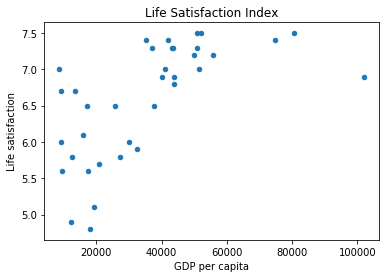

In [132]:
_ = full_country_stats.plot("GDP per capita",'Life satisfaction',kind='scatter')
plt.title('Life Satisfaction Index')

In [133]:
keepvars = full_country_stats.dtypes[full_country_stats.dtypes == float].index.values
keepvars = keepvars[:-1]
country = full_country_stats[keepvars]

In [134]:
Y = np.array(country['Life satisfaction'])
del country['Life satisfaction']
X_vars = country.columns.values
X = np.array(country)

In [135]:
def loss(yhat,y):
    """sqr error loss"""
    return (yhat - y)**2

def fit(X,Y):
    """fit the OLS from training w/ intercept"""
    lin1 = LinearRegression(fit_intercept=True) # OLS from sklearn
    lin1.fit(X,Y) # fit OLS
    return np.append(lin1.intercept_,lin1.coef_) # return betahat

def predict(x, betahat):
    """predict for point x"""
    return betahat[0] + x @ betahat[1:]

### Summary

- Supervised learning task is to predict $Y$ given $X$
- Fit is using training data to fit parameters
- Predict uses the fitted parameters to do prediction
- Loss is a function that says how poorly you did on datum $x_i,y_i$

### Risk and Empirical Risk

Given a loss $\ell(\theta; X,Y)$, for parameters $\theta$, the *risk* is 
$$
R(\theta) = \mathbb E [\ell(\theta; X,Y)].
$$

And given training data $\{x_i,y_i\}_{i=1}^{n_0}$ (drawn iid to $X,Y$), then the *empirical risk* is
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i).
$$
for fixed $\theta$ we have: 
$$\mathbb E[ R_n(\theta)] = R(\theta)$$

For a class of parameters $\Theta$, the *empirical risk minimizer (ERM)* is the 
$$
\hat \theta = \arg \min_{\theta \in \Theta} R_n(\theta)
$$
(may not be unique).

### OLS is the ERM

OLS minimizes the following objective,
$$
R_n(\beta) = \frac 1n \sum_{i=1}^n \left(y_i - x_i^\top \beta - \beta_0 \right)^2
$$
with respect to $\beta,\beta_0$.
This is the ERM for square error loss and linear predictor.

### Why is ERM a good idea?

For a fixed $\theta$ we know by the Law of Large Numbers (as long as expectations exist and data is iid),
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i) \rightarrow \mathbb E [\ell(\theta; X,Y)] = R(\theta),
$$
where convergence is in probability (or almost surely).
We want to minimize $R(\theta)$ so $R_n(\theta)$ is a pretty good surrogate.

### Example: Binary classification

Mortgage insurer pays the mortgage company if the insuree defaults on loan.  To determine how much to charge want to predict if they will default (1) or not (0).

An actuary (from 19th century) says that people that are young (less than 30) are irresponsible and will not insure them.  Let $x$ be the age in years, $y = 1$ if they default, and $\theta = 30$.

$$
g_\theta(x) = \left\{ \begin{array}{ll}
1, &x < \theta\\
0, &x \ge \theta 
\end{array}
\right.
$$

0-1 loss is
$$
\ell_{0-1}(\theta; X,Y) = \mathbf 1 \{g_\theta(X)\ne Y\}.
$$
The risk is
$$
R(\theta) = \mathbb E[ \mathbf 1 \{g_\theta(X)\ne Y\}] = \mathbb P \{ g_\theta(X) \ne Y \}.
$$
How well will he do?

### Unsupervised learning

Want to summarize/compress/learn distribution of $X$.  Clustering for example is the problem of assigning each datum to a cluster.
<img width="500px" src="kmeans.png">

Image from https://rpubs.com/cyobero/k-means

Clustering for example is the problem of assigning each datum to a cluster in index set $[C] = \{1,\ldots,C\}$ for cluster centers $z_k$,
$$
\theta = \left\{ \textrm{cluster centers, } \{ z_k \}_{k=1}^C \subset \mathbb R^p, \textrm{ cluster assignments, } \sigma:[n] \to [C] \right\}
$$
The loss is 
$$
\ell(\theta;x_i) = \| x_i - z_{\sigma(i)} \|^2 = \sum_{j=1}^p (x_{i,j} - z_{\sigma(i),j})^2.
$$
Loss, risk, and empirical risk still can be defined, but many concepts are not the same (such as bias-variance tradeoff).

### Issue with training error in Supervised learning.

Let $\hat \theta$ be the ERM, then the *training error* is
$$
R_n(\hat \theta) = \min_{\theta \in \Theta} R_n(\theta)
$$
which does NOT converge to $R(\theta)$ because
$$
\mathbb E [R_n(\hat \theta)] = \mathbb E [\min_\theta R_n(\theta)] \ne \min_{\theta} \mathbb E [R_n(\theta)] = \min_\theta R(\theta).
$$

### Solution

Split the data randomly into training and test sets: 
- train $\hat \theta$ with the training data
- test $\hat \theta$ with the test data

Because the test data is independent of $\hat \theta$ we can think of the training process as fixed and test error is now unbiased for risk of $\hat \theta$.

In [136]:
## previously we split the data using scikit learn not we do it manually
## randomly shuffle data and split and take first third for training set and second third for test set from the country set
n,p = X.shape
Ind = np.arange(n) 
np.random.shuffle(Ind) 
train_size = 2 * n // 3 +1 # set training set size
X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:]
Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]]

In [137]:
## fit on the train set
betahat = fit(X_tr,Y_tr)

## compute losses on test set
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [138]:
train_losses

[3.351422228834276e-23,
 2.5504343226894823e-23,
 6.139521725149486e-23,
 1.3912224706732929e-24,
 4.851810111471311e-24,
 2.1502778443123392e-24,
 3.1131231265851125e-23,
 1.6045509698285902e-25,
 1.6983859745046296e-25,
 2.8826574920108844e-23,
 1.1148540770978671e-22,
 8.255658142800403e-23,
 1.4484452574466672e-23,
 5.632138697141452e-24,
 5.502770557395e-23,
 2.2799165633492825e-23,
 6.793543898018518e-25,
 5.632138697141452e-24,
 6.588645166496413e-24,
 1.463356621821517e-23,
 1.3188563155328434e-24,
 1.1961684077039834e-23,
 2.257917125968841e-23,
 4.829010138044251e-23,
 3.719927951086051e-23]

In [139]:
test_losses

[37.45202688384531,
 14.701101436645237,
 1.1790833117351531,
 0.5304650584414237,
 7.944466367328166,
 20.435799319893974,
 24.845454266111577,
 8.375702310580909,
 0.422800914761098,
 184.560718644866,
 30.865436441141746]

In [140]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))
print("n p :",n,p)

## massive discrepency between average test loss and train loss
## traiing error = empricial risk
## now because train set samples (n) is not much more than the parameters (p), empricial risk is nowhere near true risk 

train avg loss: 2.5198537668225733e-23
test avg loss: 30.1193686323046
n p : 36 24


In [141]:
def train_test_split(X,Y,split_pr = 0.5):
    """train-test split"""
    n,p = X.shape
    Ind = np.arange(n) 
    np.random.shuffle(Ind) 
    train_size = int(split_pr * n) # set training set size
    X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:]
    Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]]
    return (X_tr,Y_tr), (X_te, Y_te)

In [147]:
## now we do the same thing on the wine dataset

Y = wine_ar[:,-1]
X = wine_ar[:,:-1]
n,p = X.shape

(X_tr,Y_tr), (X_te, Y_te) = train_test_split(X,Y)

In [148]:
betahat = fit(X_tr,Y_tr)

## compute losses on test set
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [149]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))

print("n p :",n,p)


## hear we did linear regression, and n is much larger than p meaning that number of training samples is larger than number estimating parameteres that's why emprical risk is close to true risk 
## number of dimension is much less than number of samples
## avg training loss = empirical risk is very close to avg test error albeit a bit biased downwards

train avg loss: 0.41735226857678454
test avg loss: 0.4252413821497859
n p : 1599 11


### Summary

- Want to minimize true risk (expected loss)
- Instead we minimize empirical risk (training error)
- Training error is now biased, so we do training test split